In [1]:
from src.preprocess import Preprocessor
from src.utils import visualize_loader

from matplotlib import pyplot as plt
import torch
from src.models import ModelSelector
from src.settings import configs
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.distributed as dist
from torchvision.transforms import AutoAugmentPolicy

Failed to use DDP!


In [2]:
# Transform for submit test images
trans_train = transforms.Compose([
    # transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    # transforms.Normalize([0.8154, 0.7915, 0.7389], [0.2073, 0.2196, 0.2408]),
    ])

# Transform for training dataset
trans_test = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.ToTensor(),
    # transforms.Normalize([0.8154, 0.7915, 0.7389], [0.2073, 0.2196, 0.2408])
    ])
p = Preprocessor(trans_train=trans_train, trans_test=trans_test)



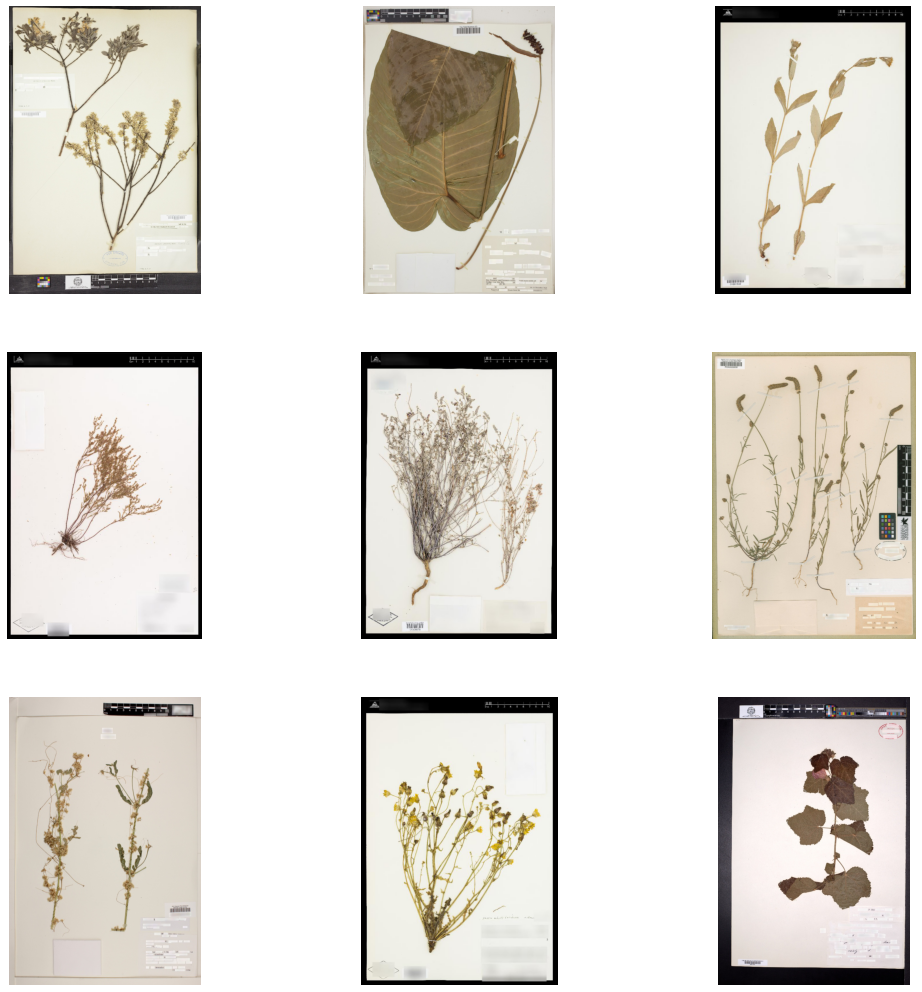

In [3]:
p.visualize_data(rand=False, train=True, size_mul=3, n=9)

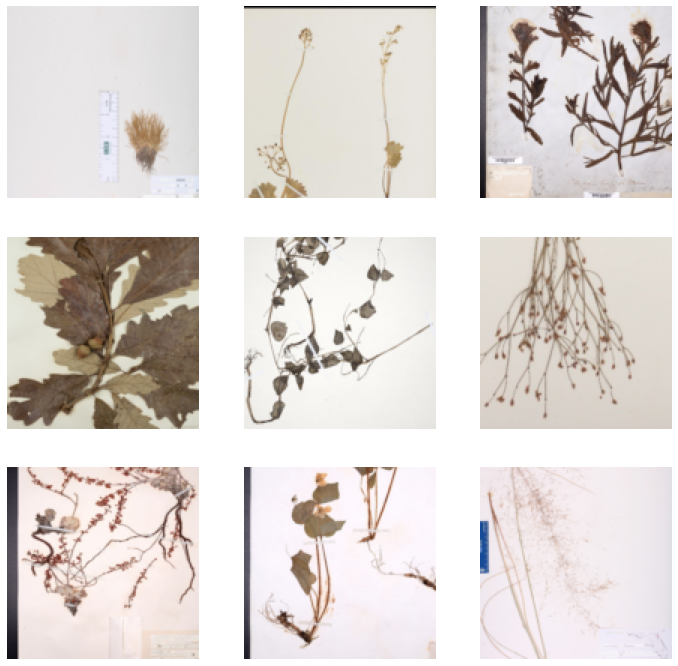

In [4]:
p.visualize_data(rand=False, train=False, size_mul=2, n=9)

In [5]:
# from src.utils import batch_mean_and_sd
# batch_mean_and_sd(transform=trans_train)